# Importar Librerías

In [1]:
# Manipulación de Datos
import pandas as pd
import numpy as np

# Visualización de Datos
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
sns.set(style='white', context='notebook', palette='deep')

# Preprocesamiento
from sklearn.preprocessing import StandardScaler

# Machine Learning / Clustering
from sklearn.cluster import KMeans


# Cargar el Dataset

In [2]:
# Cargar toda la información del dataset
datos = pd.read_csv('VENTAS.csv')

In [3]:
datos.head()

,fecha,propietario_nombre,propietario_cedula,tripulante_nombre,tripulante_cedula,embarcacion_nombre,embarcacion_matricula,galones,motores,zarpe,factura,sector
0,3/1/2021,MARIN PARRALES JOHNNY ANIBAL,080206690-2,MARIN PARRALES JOHNNY ANIBAL,080206690-2,ELIZABETH I,B -02-05041,460,75HP / 40HP,1501969-2021,6001000005107,PUERTO PESQUERO
1,3/1/2021,BENNETT TORRES WASHINGTON,080216148-9,BENNETT TORRES WASHINGTON,080216148-9,BIGLA X,B -02-08860,552,75HP / 75HP,1495877-2020,6001000005108,PUERTO PESQUERO
2,3/1/2021,PARRALES ALAVA BALTAZAR FRANCISCO,080048207-7,PARRALES ALAVA BALTAZAR FRANCISCO,080048207-7,PAJARITO V,B -02-03699,368,75HP,1497116-2020,6001000005109,PUERTO PESQUERO
3,3/1/2021,PARRALES QUIJIJE FRANCISCO FELIPE,080237238-3,PARRALES QUIJIJE FRANCISCO FELIPE,080237238-3,CHAVITA,B -02-08240,368,75HP,1497107-2020,6001000005110,PUERTO PESQUERO
4,3/1/2021,CORTEZ BAGUI CARLOS AIRON,080140596-0,CORTEZ BAGUI CARLOS AIRON,080140596-0,MARIA YOLANDA,B -02-05506,460,75HP,1497149-2020,6001000005111,PUERTO PESQUERO


#Pre-procesamiento de Datos


In [4]:

# Evaluación de los datos ausentes
datos_ausentes = datos.isnull().sum()  # Conteo de datos ausentes por columna
porcentaje_ausentes = (datos_ausentes / len(datos)) * 100  # Porcentaje de datos ausentes

# Creando un DataFrame para mostrar los resultados
analisis_datos_ausentes = pd.DataFrame({'Datos Ausentes': datos_ausentes, 'Porcentaje (%)': porcentaje_ausentes})
analisis_datos_ausentes.sort_values(by='Datos Ausentes', ascending=False)  # Ordenando por la cantidad de datos ausentes


,Datos Ausentes,Porcentaje (%)
sector,3,0.027260
motores,1,0.009087
fecha,0,0.000000
propietario_nombre,0,0.000000
propietario_cedula,0,0.000000
tripulante_nombre,0,0.000000
tripulante_cedula,0,0.000000
embarcacion_nombre,0,0.000000
embarcacion_matricula,0,0.000000
galones,0,0.000000


In [5]:
# Eliminando todas las filas con datos ausentes
ventas_df = datos.dropna()

# Verificando el resultado
ventas = ventas_df.isnull().sum()  # Conteo de datos ausentes en el DataFrame limpio
ventas, len(ventas_df)  # Mostrando los datos ausentes y el número de filas del DataFrame limpio


(fecha                    0
 propietario_nombre       0
 propietario_cedula       0
 tripulante_nombre        0
 tripulante_cedula        0
 embarcacion_nombre       0
 embarcacion_matricula    0
 galones                  0
 motores                  0
 zarpe                    0
 factura                  0
 sector                   0
 dtype: int64,
 11001)

In [6]:
#Veamos la dimensionalidad de los datos
print(ventas_df.shape)
#De la salida, podemos ver que la tabla contiene 11001 filas y 12 columnas.

(11001, 12)


In [7]:
#Utilizamos el método info() para obtener información general
print(ventas_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11001 entries, 0 to 11004
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   fecha                  11001 non-null  object
 1   propietario_nombre     11001 non-null  object
 2   propietario_cedula     11001 non-null  object
 3   tripulante_nombre      11001 non-null  object
 4   tripulante_cedula      11001 non-null  object
 5   embarcacion_nombre     11001 non-null  object
 6   embarcacion_matricula  11001 non-null  object
 7   galones                11001 non-null  int64 
 8   motores                11001 non-null  object
 9   zarpe                  11001 non-null  object
 10  factura                11001 non-null  int64 
 11  sector                 11001 non-null  object
dtypes: int64(2), object(10)
memory usage: 1.1+ MB
None


In [8]:
# Configuración de estilos de gráficos
sns.set(style="whitegrid")

#visualización de cada posible variable del dataset

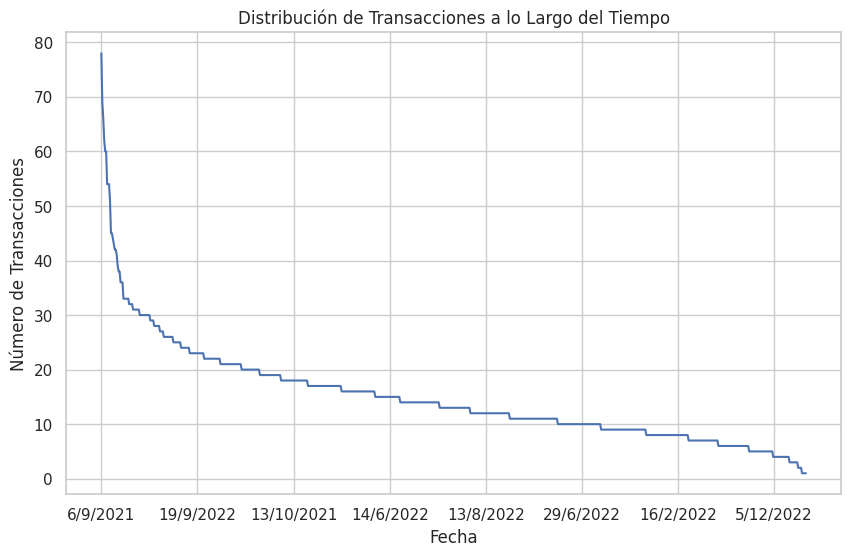

In [9]:
# 1. Distribución de Transacciones a lo Largo del Tiempo
plt.figure(figsize=(10, 6))
ventas_df['fecha'].value_counts().plot(kind='line')
plt.title('Distribución de Transacciones a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Número de Transacciones')
plt.show()

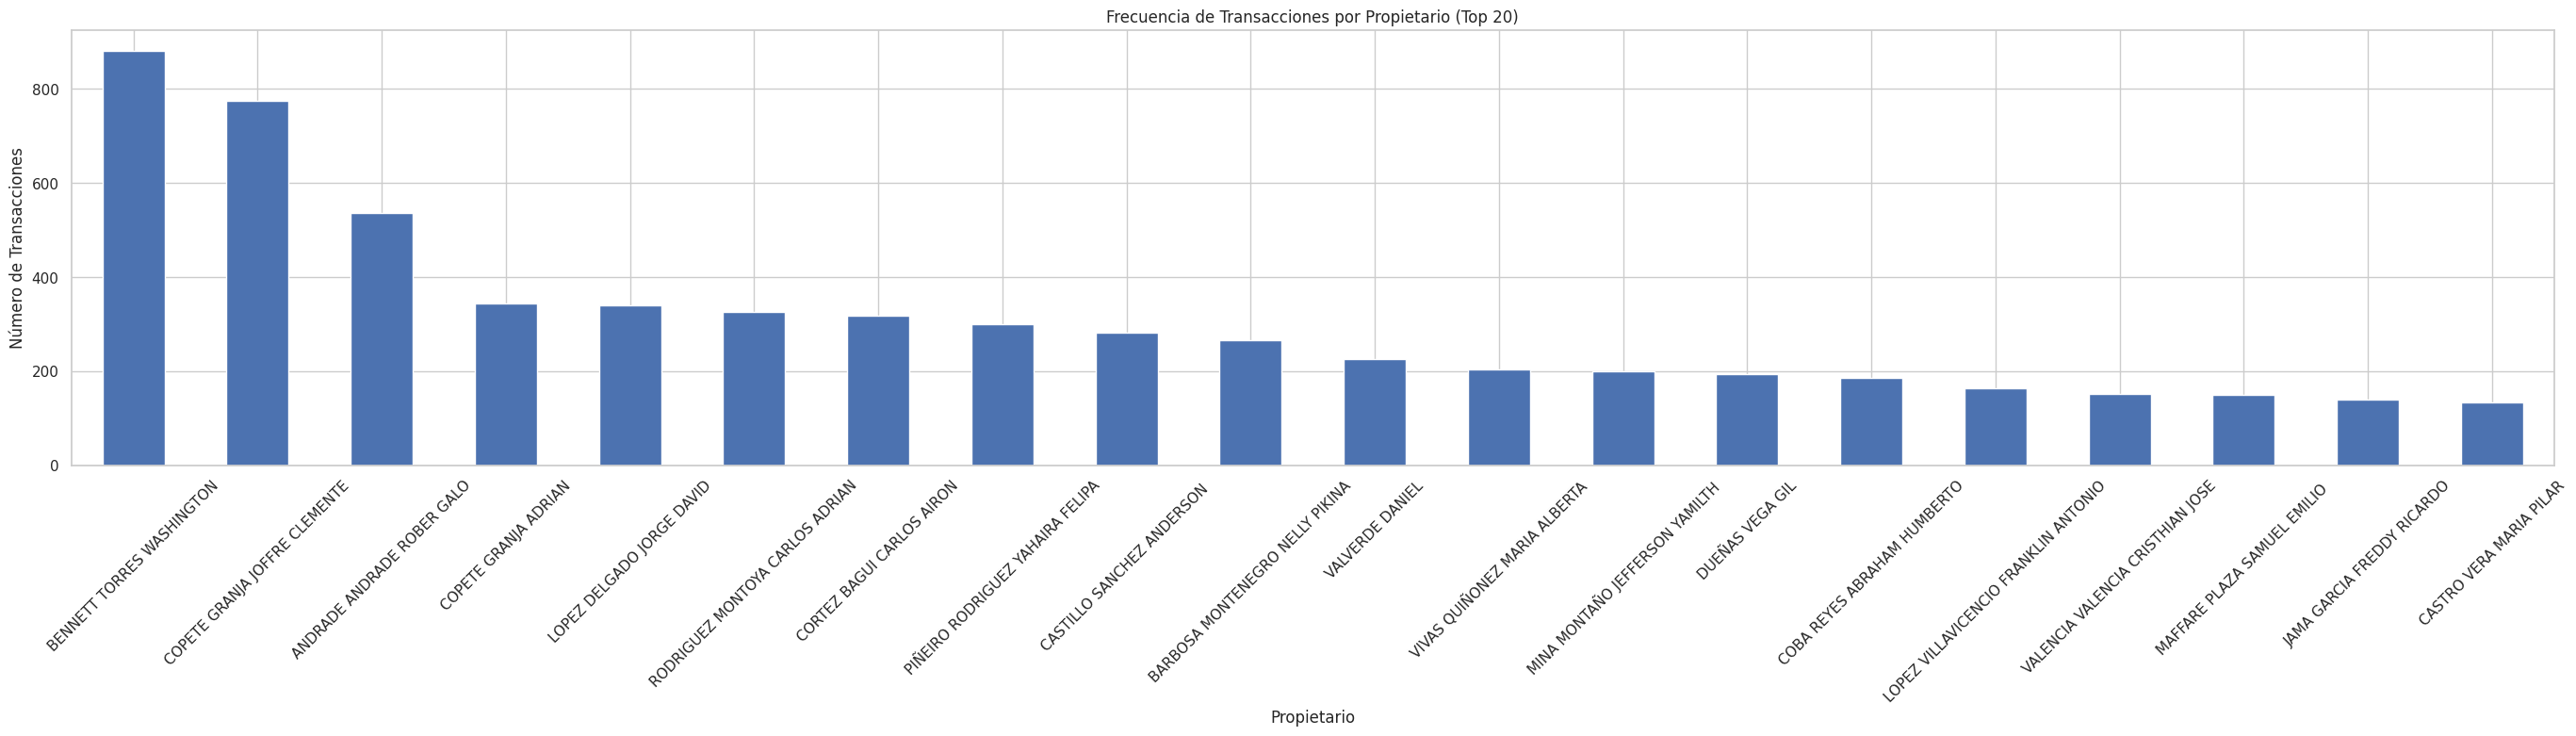

In [10]:
# 2. Frecuencia de Transacciones por Propietario
plt.figure(figsize=(34, 6))
ventas_df['propietario_nombre'].value_counts().head(20).plot(kind='bar')
plt.title('Frecuencia de Transacciones por Propietario (Top 20)')
plt.xlabel('Propietario')
plt.ylabel('Número de Transacciones')
plt.xticks(rotation=45)
plt.show()

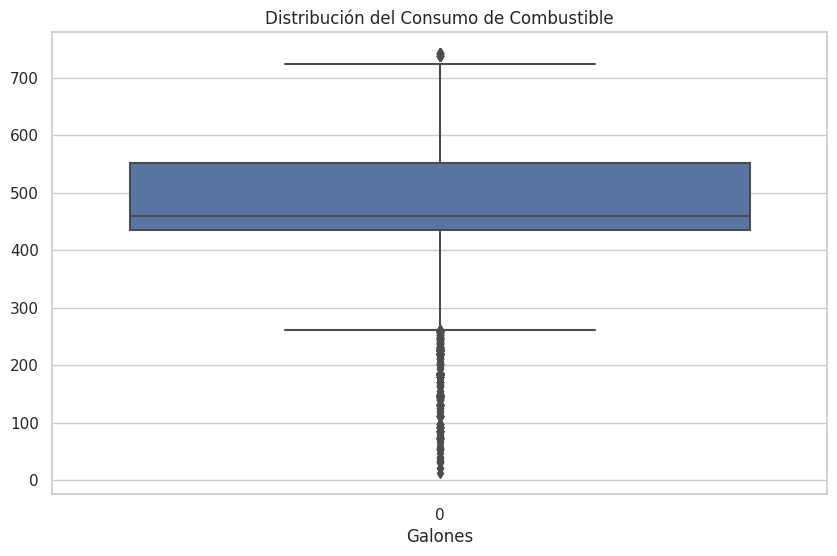

In [11]:
# 3. Distribución del Consumo de Combustible
plt.figure(figsize=(10, 6))
sns.boxplot(ventas_df['galones'])
plt.title('Distribución del Consumo de Combustible')
plt.xlabel('Galones')
plt.show()

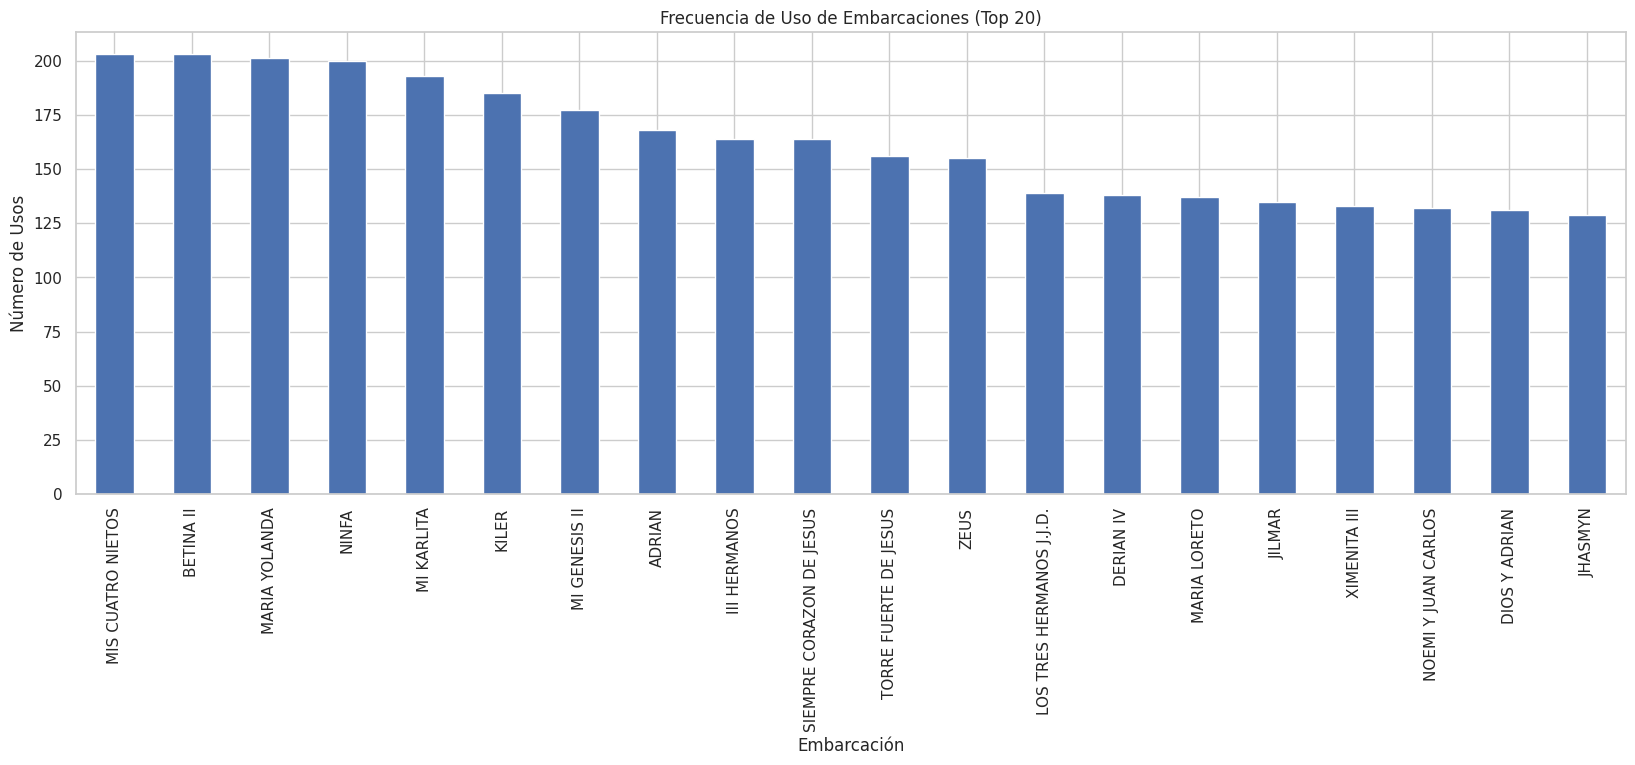

In [12]:
# 4. Frecuencia de Uso de Embarcaciones
plt.figure(figsize=(20, 6))
ventas_df['embarcacion_nombre'].value_counts().head(20).plot(kind='bar')
plt.title('Frecuencia de Uso de Embarcaciones (Top 20)')
plt.xlabel('Embarcación')
plt.ylabel('Número de Usos')
plt.show()

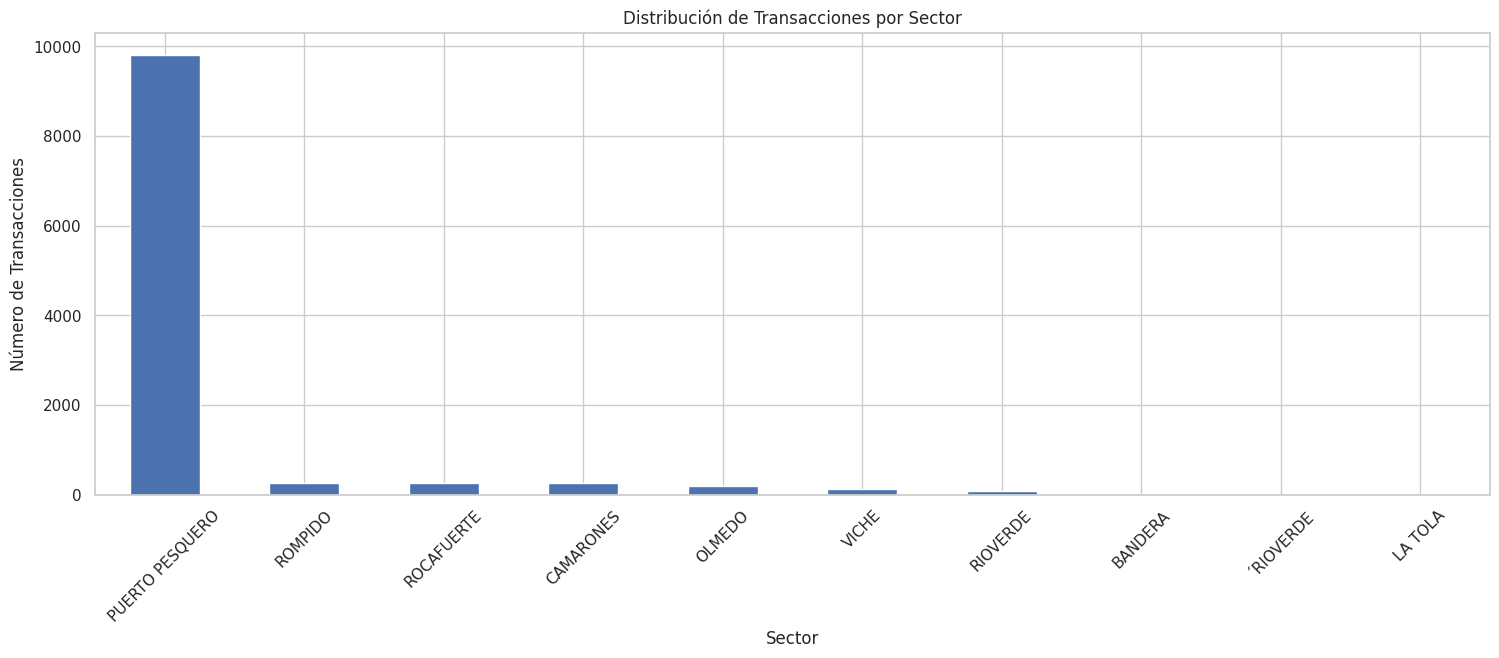

In [13]:

# 7. Distribución de Transacciones por Sector
plt.figure(figsize=(18, 6))
ventas_df['sector'].value_counts().plot(kind='bar')
plt.title('Distribución de Transacciones por Sector')
plt.xlabel('Sector')
plt.ylabel('Número de Transacciones')
plt.xticks(rotation=45)
plt.show()


#Estadísticas del Cluster

#Hipótesis: "Las embarcaciones propiedad de individuos con múltiples transacciones tienden a tener un mayor consumo de combustible y actividad (medido por registros de zarpe)."

In [14]:
# Agrupando las transacciones por propietario y calculando el total de transacciones y galones consumidos por cada uno
agrupado_por_propietario = ventas_df.groupby('propietario_nombre').agg({'galones': ['count', 'sum']})
agrupado_por_propietario.columns = ['total_transacciones', 'total_galones']

# Normalizando los datos para el clustering
agrupado_normalizado = (agrupado_por_propietario - agrupado_por_propietario.mean()) / agrupado_por_propietario.std()

# Aplicando el algoritmo de clustering K-means
kmeans = KMeans(n_clusters=3, random_state=0).fit(agrupado_normalizado)

# Añadiendo las etiquetas del cluster al dataframe
agrupado_por_propietario['cluster'] = kmeans.labels_

# Mostrando los primeros registros del dataframe con la información del cluster
agrupado_por_propietario.head()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,total_transacciones,total_galones,cluster
propietario_nombre,,,
AGUIRRE ARBOLEDA JOHN PAUL,33,18216,0
ALEGRIA CASTILLO JOSE MERCEDES,1,276,0
ANDRADE ANDRADE ROBER GALO,536,269758,2
ANDRADE ANIBAL SIGIFREDO,34,13248,0
ANGULO ORTIZ DATSON TIBERIO,2,673,0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

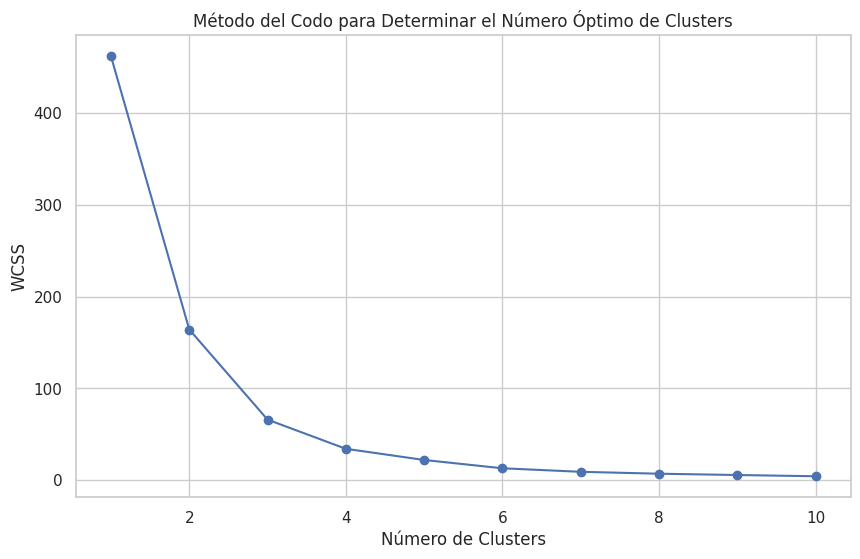

In [15]:
from sklearn.cluster import KMeans

# El método del codo para determinar el número óptimo de clusters
wcss = []  # Lista para almacenar la suma de los cuadrados de las distancias dentro del cluster
rangos_k = range(1, 11)  # Probaremos con 1 a 10 clusters

for k in rangos_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(agrupado_normalizado)
    wcss.append(kmeans.inertia_)

# Creando un gráfico para visualizar el método del codo
plt.figure(figsize=(10, 6))
plt.plot(rangos_k, wcss, 'bo-')
plt.title('Método del Codo para Determinar el Número Óptimo de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')  # WCSS: Within-Cluster Sum of Squares
plt.show()


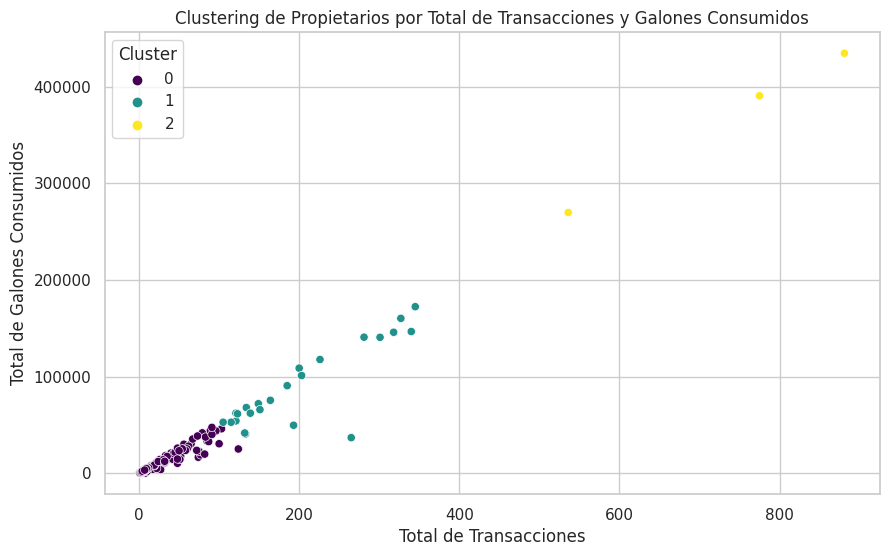

In [16]:
# Creando un gráfico de dispersión para visualizar los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_transacciones', y='total_galones', hue='cluster', data=agrupado_por_propietario, palette='viridis')
plt.title('Clustering de Propietarios por Total de Transacciones y Galones Consumidos')
plt.xlabel('Total de Transacciones')
plt.ylabel('Total de Galones Consumidos')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


#Hipótesis: "El tipo de embarcación  influye en el volumen de combustible consumido."

In [17]:
# Agrupando las transacciones por embarcación y calculando el total de galones consumidos por cada embarcación
agrupado_por_embarcacion = ventas_df.groupby('embarcacion_nombre').agg({'galones': 'sum'})

# Normalizando los datos para el clustering
agrupado_normalizado_embarcacion = (agrupado_por_embarcacion - agrupado_por_embarcacion.mean()) / agrupado_por_embarcacion.std()

# Aplicando el algoritmo de clustering K-means
kmeans_embarcacion = KMeans(n_clusters=3, random_state=0).fit(agrupado_normalizado_embarcacion)

# Añadiendo las etiquetas del cluster al dataframe de embarcaciones
agrupado_por_embarcacion['cluster'] = kmeans_embarcacion.labels_

# Mostrando los primeros registros del dataframe con la información del cluster
agrupado_por_embarcacion.head()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,galones,cluster
embarcacion_nombre,,
2 HERMANOS POR SIEMPRE,257,0
3 AMORES 1,584,0
3 AMORES 2,184,0
ABEL JOSHUE,10000,0
ADIEL,26036,2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

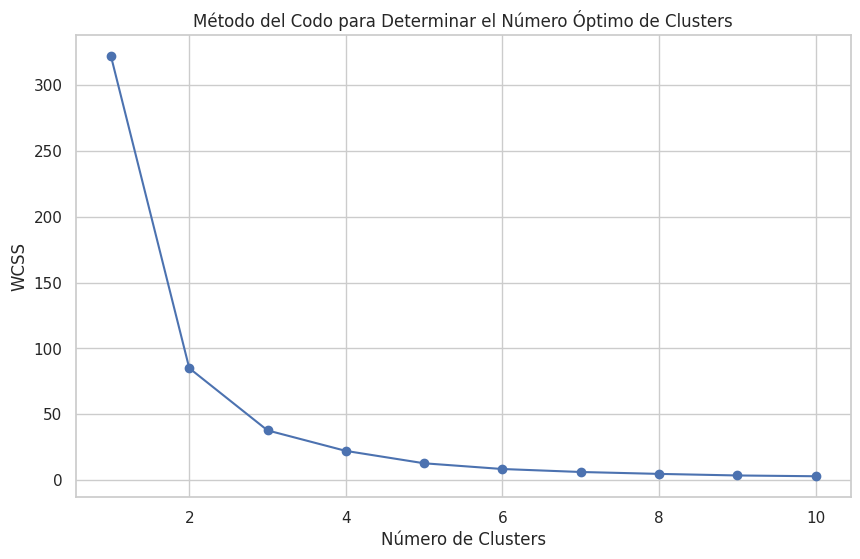

In [18]:
from sklearn.cluster import KMeans

# El método del codo para determinar el número óptimo de clusters
wcss = []  # Lista para almacenar la suma de los cuadrados de las distancias dentro del cluster
rangos_k = range(1, 11)  # Probaremos con 1 a 10 clusters

for k in rangos_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(agrupado_normalizado_embarcacion)
    wcss.append(kmeans.inertia_)

# Creando un gráfico para visualizar el método del codo
plt.figure(figsize=(10, 6))
plt.plot(rangos_k, wcss, 'bo-')
plt.title('Método del Codo para Determinar el Número Óptimo de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')  # WCSS: Within-Cluster Sum of Squares
plt.show()


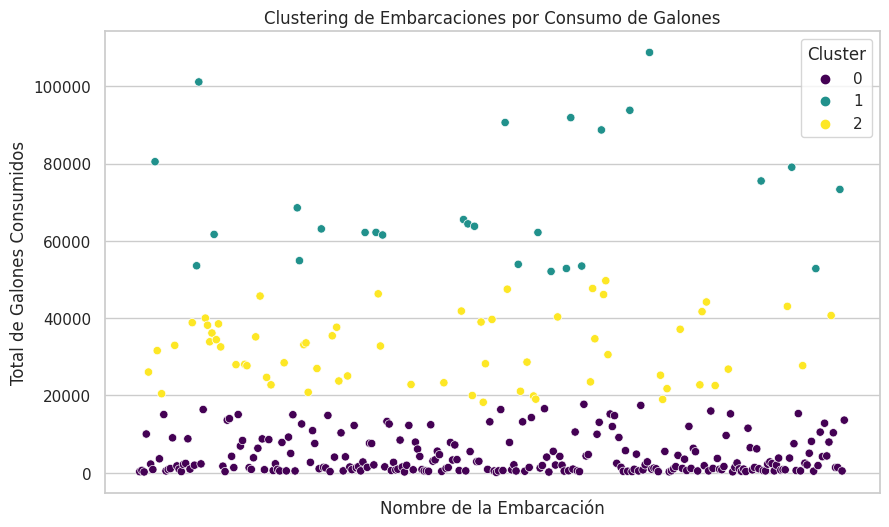

In [19]:
# Creando un gráfico de dispersión para visualizar los clusters de embarcaciones

plt.figure(figsize=(10, 6))
sns.scatterplot(x=agrupado_por_embarcacion.index, y='galones', hue='cluster', data=agrupado_por_embarcacion, palette='viridis')
plt.title('Clustering de Embarcaciones por Consumo de Galones')
plt.xlabel('Nombre de la Embarcación')
plt.ylabel('Total de Galones Consumidos')
plt.xticks([])  # Eliminando las leyendas del eje x
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


#Hipótesis: "Las embarcaciones pueden agruparse en diferentes tipos de actividad basándose en su consumo de combustible y frecuencia de zarpe."

In [20]:

# Preparación de datos: calculando el total de galones consumidos y la frecuencia de zarpe por embarcación
agrupado_embarcacion = ventas_df.groupby('embarcacion_nombre').agg({'galones': 'sum', 'zarpe': 'count'})
agrupado_embarcacion.columns = ['total_galones', 'frecuencia_zarpe']

# Normalización de datos
scaler = StandardScaler()
agrupado_normalizado = scaler.fit_transform(agrupado_embarcacion)

# Aplicación de K-means
kmeans = KMeans(n_clusters=3, random_state=42)
agrupado_embarcacion['cluster'] = kmeans.fit_predict(agrupado_normalizado)

# Resultados de clustering
agrupado_embarcacion.head()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,total_galones,frecuencia_zarpe,cluster
embarcacion_nombre,,,
2 HERMANOS POR SIEMPRE,257,1,0
3 AMORES 1,584,2,0
3 AMORES 2,184,1,0
ABEL JOSHUE,10000,22,0
ADIEL,26036,48,2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

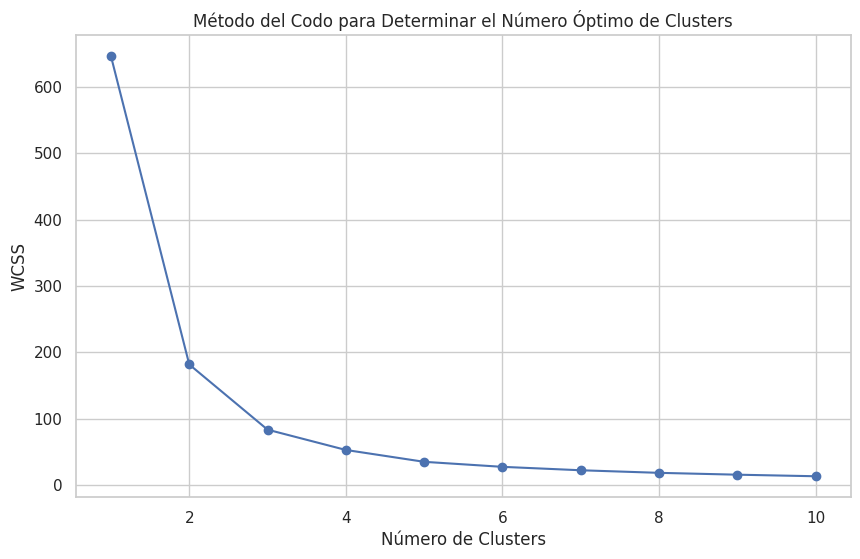

In [21]:
from sklearn.cluster import KMeans

# El método del codo para determinar el número óptimo de clusters
wcss = []  # Lista para almacenar la suma de los cuadrados de las distancias dentro del cluster
rangos_k = range(1, 11)  # Probaremos con 1 a 10 clusters

for k in rangos_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(agrupado_normalizado)
    wcss.append(kmeans.inertia_)

# Creando un gráfico para visualizar el método del codo
plt.figure(figsize=(10, 6))
plt.plot(rangos_k, wcss, 'bo-')
plt.title('Método del Codo para Determinar el Número Óptimo de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')  # WCSS: Within-Cluster Sum of Squares
plt.show()


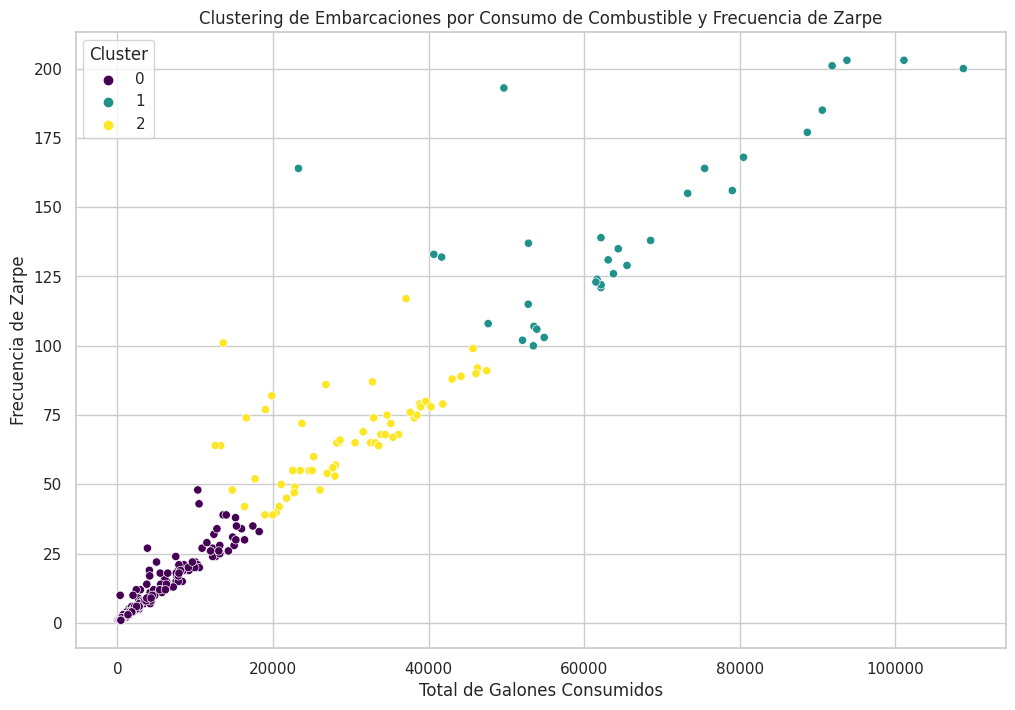

In [22]:
# Creando un gráfico de dispersión para visualizar los clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='total_galones', y='frecuencia_zarpe', hue='cluster', data=agrupado_embarcacion, palette='viridis')
plt.title('Clustering de Embarcaciones por Consumo de Combustible y Frecuencia de Zarpe')
plt.xlabel('Total de Galones Consumidos')
plt.ylabel('Frecuencia de Zarpe')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()
